In [1]:
# Pandas kütüphanesi veri yükleme ve ön işleme işlemleri için kullanılır.
import pandas as pd

In [5]:
# .read_csv(), csv uzantılı veri setini yüklemek için kullanılır.
data = pd.read_csv("datasets/insurance.csv")

In [6]:
#.head(), veri setine ait ilk beş veriyi gösterir.
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# .shape(), veri setine ait satır ve sütun sayısını verir. İlki örneklem, ikicisi ise nitelik sayısıdır. 
data.shape

(1338, 7)

In [10]:
# .info(), veri setinin kolon, veri tipi, index vb. bilgilerini gösterir.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
# .isnull(), veri setinde bulunan eksik verilerin bilgisini döndürür. Sonuç "True" ise eksik veri var demektir.
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [12]:
# .sum(), toplama işlemi için kullanılır. Burada eksik verilerin toplam sayısını görmek için kullanıyoruz.
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
# .dtypes, veri setinde bulunan değişkenlerin veri tiplerini listeler
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [16]:
# .astype(), değişkenin veri tipini değiştirir. İşleyebilmemiz için veri tipinin kütüphaneye uygun olması gerekir.
data["sex"] = data["sex"].astype("category")
data["smoker"] = data["smoker"].astype("category")
data["region"] = data["region"].astype("category")

In [17]:
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [20]:
# .describe(), veri setine ait sayısal bilgileri listeler. Daha düzenli görülmesi için ".T" ile transpozu alınır. 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [23]:
# .groupby(), istenilen sütuna ait verileri gruplar. .mean(), değerlerin ortalamasını alırken, .round() virgülden sonra gelecek basamak sayısını belirler.
smoke_data = data.groupby("smoker").mean().round(2)

In [24]:
smoke_data

,age,bmi,children,charges
smoker,,,,
no,39.39,30.65,1.09,8434.27
yes,38.51,30.71,1.11,32050.23


In [25]:
# Seaborn, istatistiksel grafik gösterimi sağlar. 
import seaborn as sns

In [26]:
# .set_style(), çizilecek olan grafiğin stillini ayarlar.
sns.set_style("whitegrid")

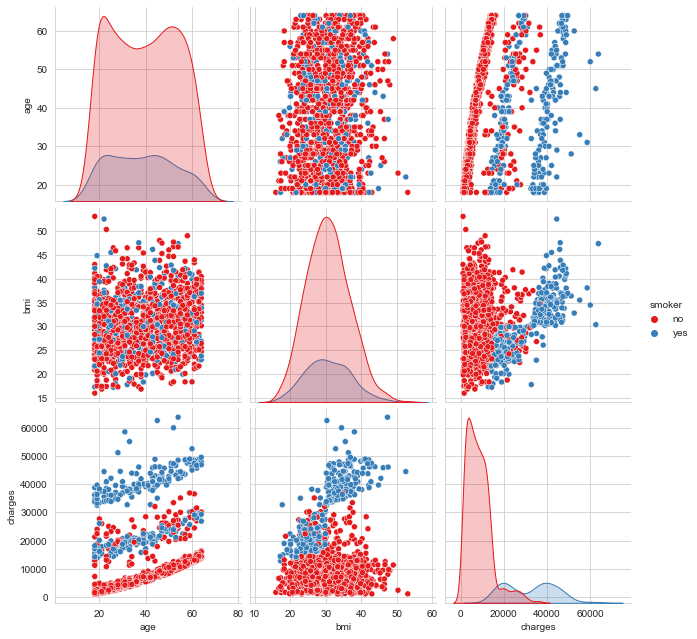

In [28]:
# .pairplot(), istenilen veriler arasında ikili ilişkiler oluşturur ve bunları grafiğe yansıtır. hue=  renklenmesini istediğimiz sütun bilgisi, palette= renk ayarıdır.
sns.pairplot(data[["age","bmi","charges","smoker"]], 
                    hue= "smoker", height= 3, palette="Set1" )

<AxesSubplot:>

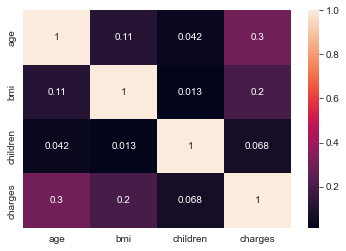

In [30]:
# heatmap(), ısı haritasıdır. .corr(), sayısal değişkenler arasındaki ikili ilişkileri (korelasyonu) gösterir.
sns.heatmap(data.corr(), annot=True)

In [33]:
#One-Hot Encode'den önce
# .columns, veri tabanına ait indexleri listeler
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [31]:
# .get_dummies(), verileri Dummy veri tipine çevirir. Verileri analize dahil etmek için yapılması gerekmektedir 
data = pd.get_dummies(data)

In [32]:
#One-Hot Encode'den sonra
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [34]:
# .drop() belirtilen veriyi kesip atar. Veri sütun olduğundan axis = 1 yazılır.
# X : veri, data, 2 boyutlu matristir. Bağımsızdır
# y : etiket, çıktıyı temsil eder. 1 boyutlu vektördür.
X = data.drop("charges", axis = 1)
y = data["charges"]

In [35]:
# train_test_split metodu, veri setini karıştırarak eğitim ve test verisi olmak üzere iki parçaya ayırır. 
from sklearn.model_selection import train_test_split

In [36]:
# train_size, parçalanma oranıdır.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=1)

In [37]:
# LinearRegression, bağımlı ve bağımsız değişkenler arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulur.
from sklearn.linear_model import LinearRegression

In [38]:
# .fit() eğitim verileri ile modeli kurar.
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
# .score() doğruluk oranını verir. Test ve eğitim verilerinin oranına bakarak karşılaştırma yapmamızı sağlar.
lr.score(X_test, y_test).round(3)

0.762

In [40]:
lr.score(X_train, y_train).round(3)
# Değerler birbirine yakınsa model iyi çalışıyor demektir. Fakat test skoru, eğitimden büyük olduğundan Over-Fitting ihtimali vardır.

0.748

In [43]:
# .predict() tahmin işlemlerinde kullanılır. 
y_pred = lr.predict(X_test)

In [41]:
# mean_squared_error kütüphanesi, test veri setini değerlendirmek için kullanılır.
from sklearn.metrics import mean_squared_error
import math

In [44]:
math.sqrt(mean_squared_error(y_test, y_pred))

5956.454717976427

In [45]:
data_new = X_train[:1]

In [47]:
data_new

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
216,53,26.6,0,1,0,1,0,0,1,0,0


In [48]:
lr.predict(data_new)

array([10508.41885042])

In [49]:
y_train[:1]

216    10355.641
Name: charges, dtype: float64